In [34]:
import torch
import torch.nn.functional as F
from torchmetrics.functional import structural_similarity_index_measure
from matplotlib import pyplot as plt

from datasets.data import DIV2K
from metrics import PSNR, SSIM

In [35]:
data_dir = "F:\superRes\datasets\DIV2K"

valid_dataset = DIV2K(data_dir, train=True)
valid_loader = torch.utils.data.DataLoader(valid_dataset, batch_size=8, shuffle=True)

In [36]:
psnr = 0
ssim = 0

for i, (lr, hr) in enumerate(valid_loader):
    
    output = F.interpolate(lr, scale_factor=4, mode='bicubic', align_corners=False)
    
    psnr += PSNR(output, hr)
    ssim += SSIM(output, hr)

print(f"PSNR: {psnr / len(valid_loader)}")
print(f"SSIM: {ssim / len(valid_loader)}")


    
    

KeyboardInterrupt: 

c:\Users\Erik\anaconda3\envs\systoolchain\lib\site-packages\torchmetrics\utilities\prints.py:70: FutureWarning: Importing `spectral_angle_mapper` from `torchmetrics.functional` was deprecated and will be removed in 2.0. Import `spectral_angle_mapper` from `torchmetrics.image` instead.
  _future_warning(
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


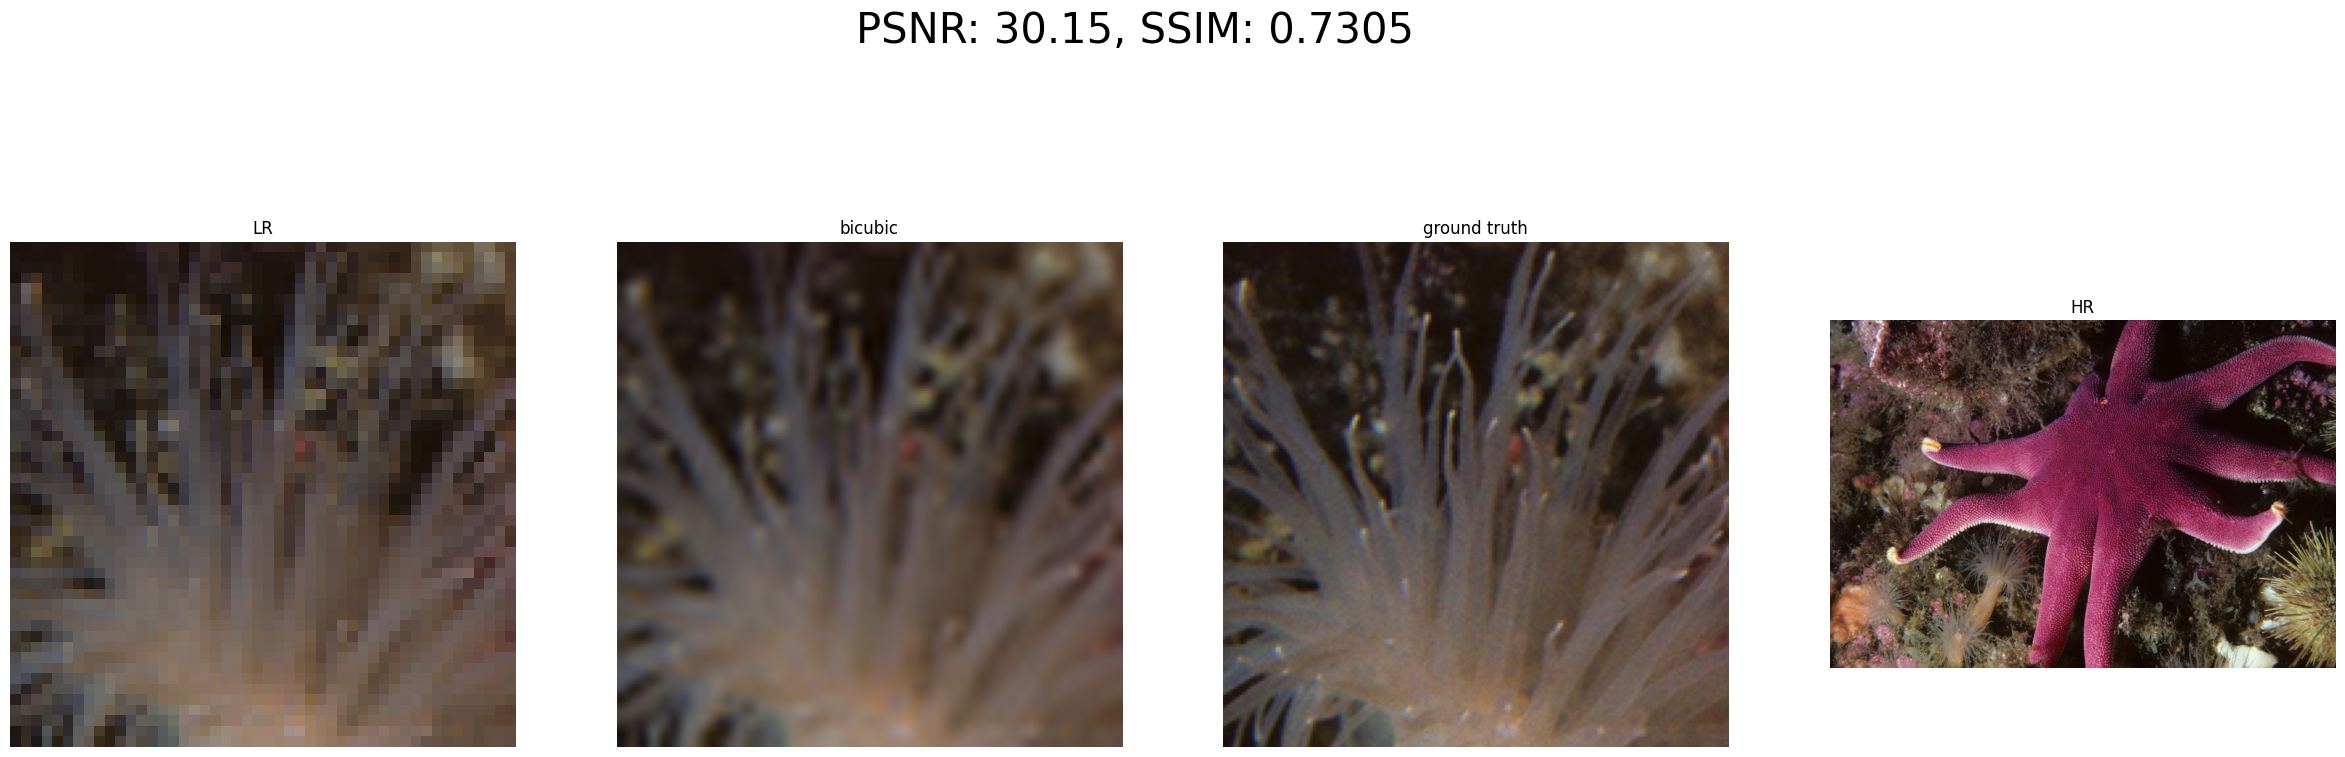

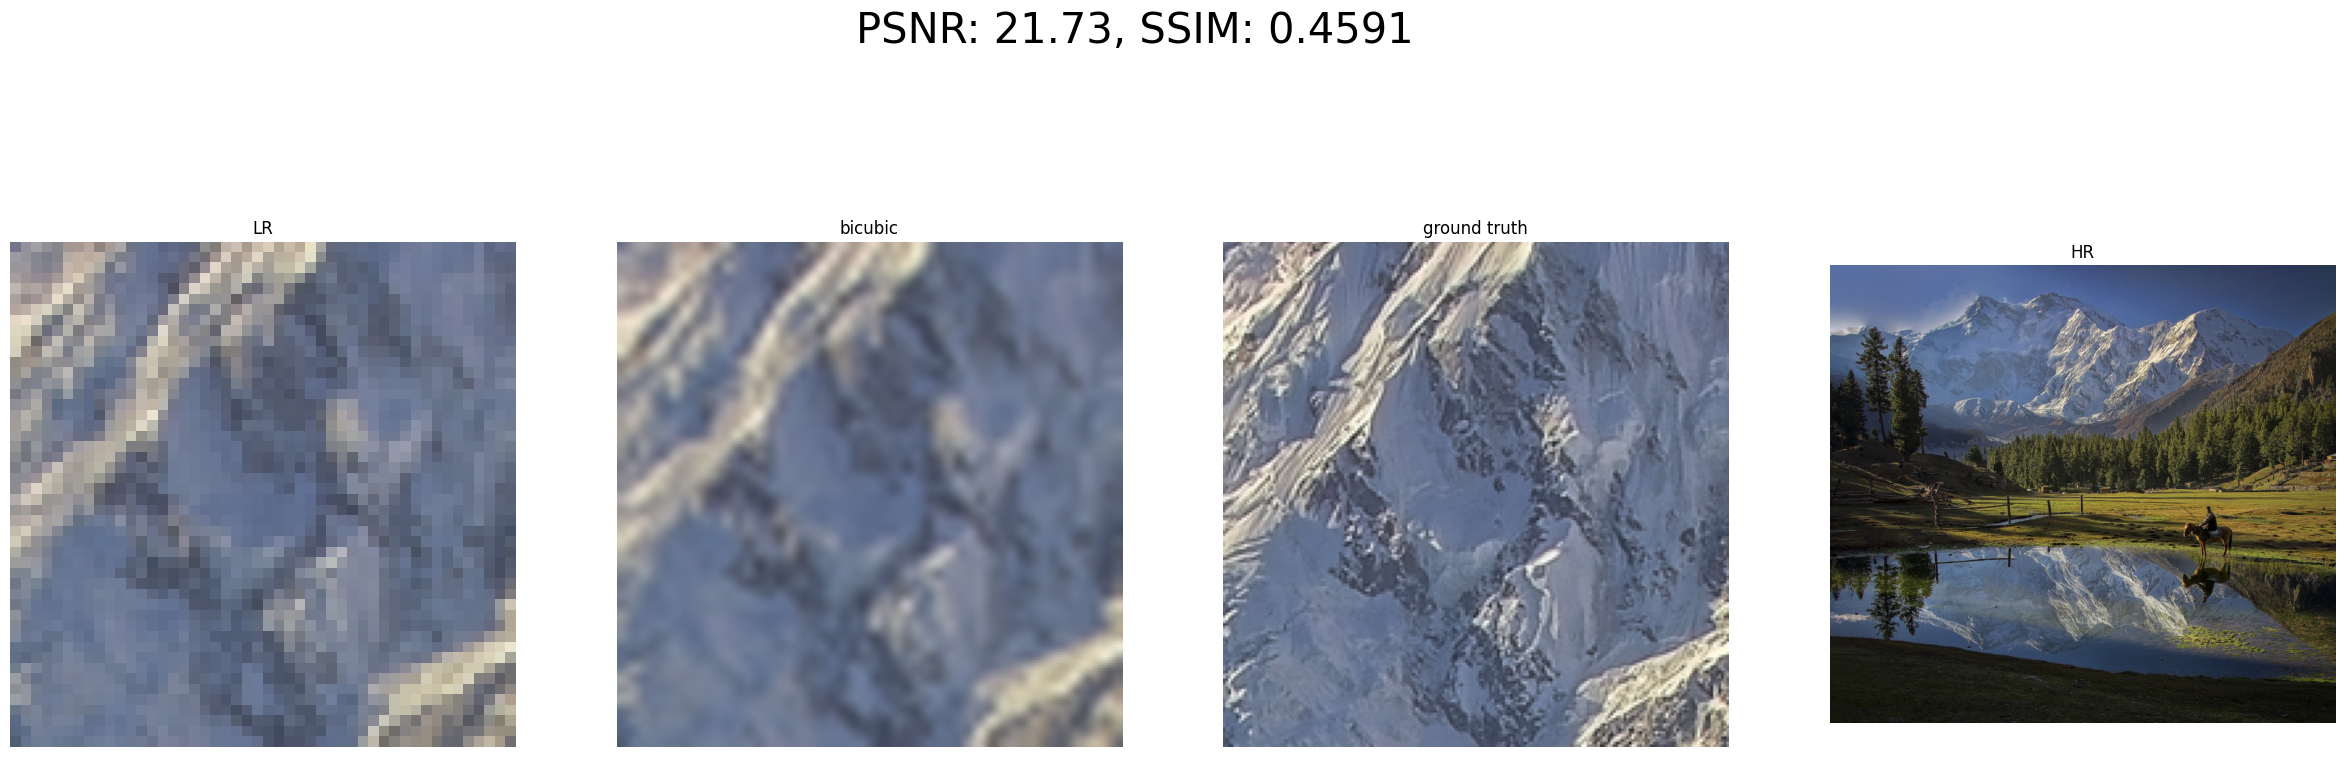

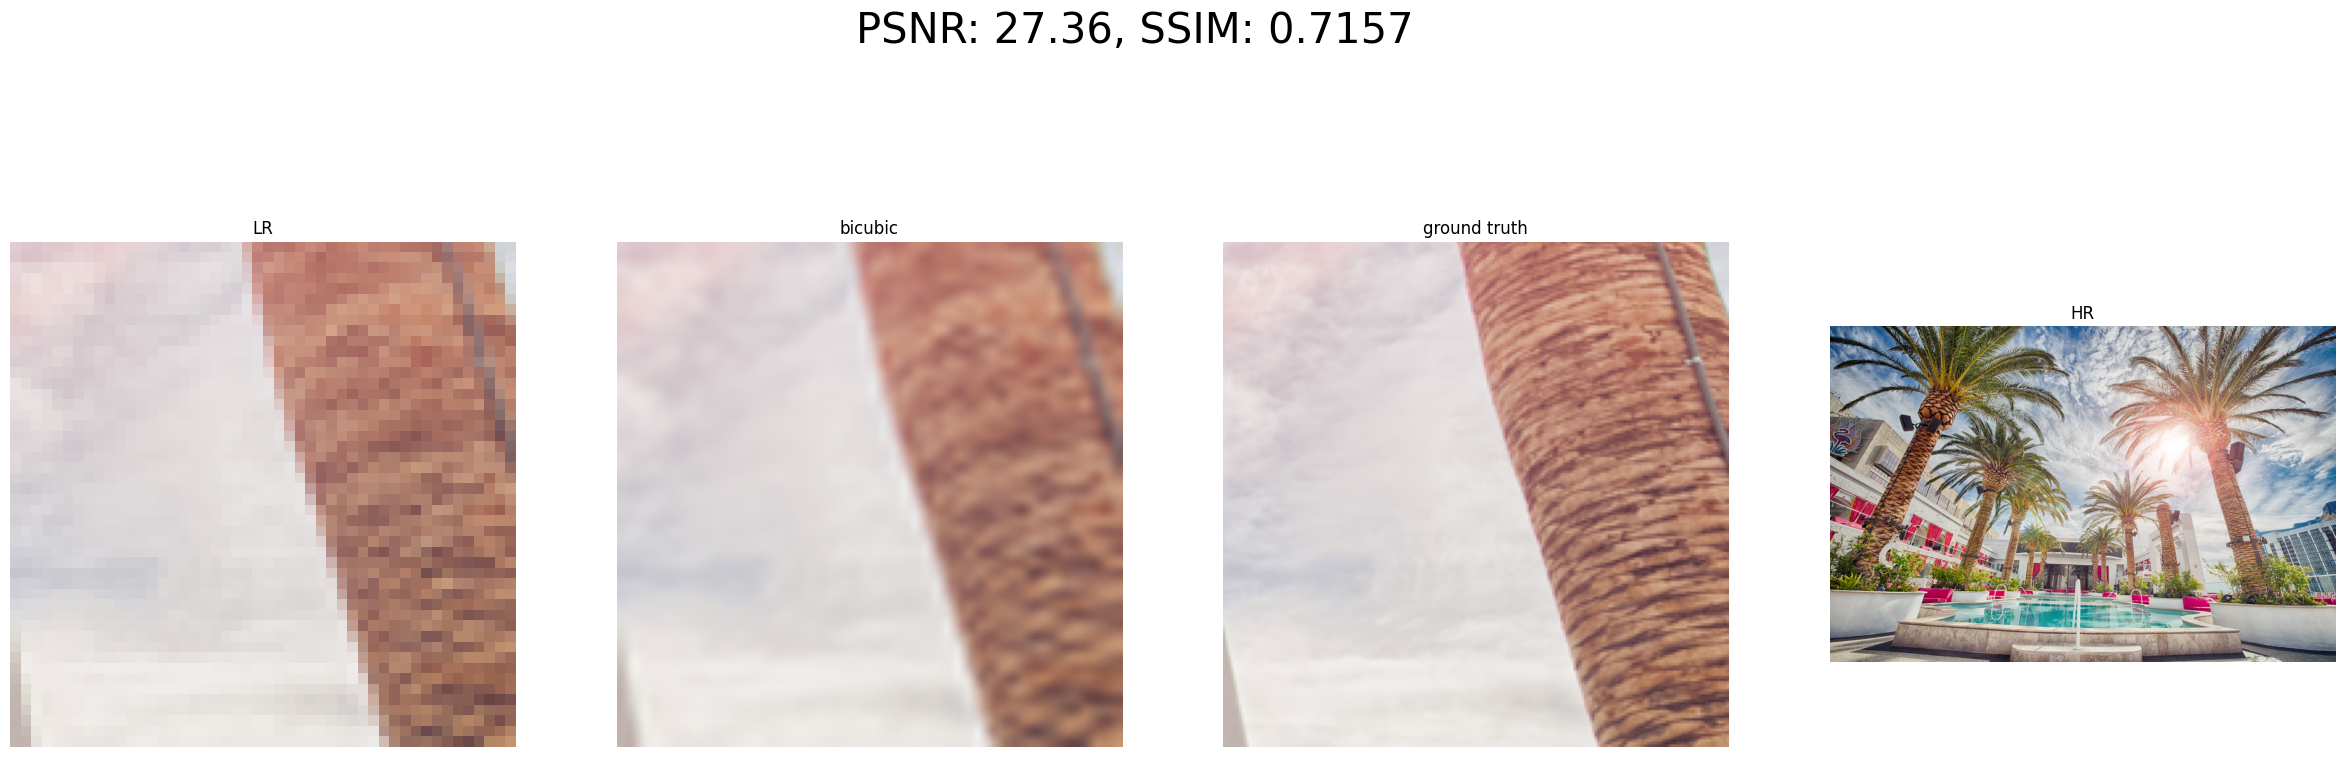

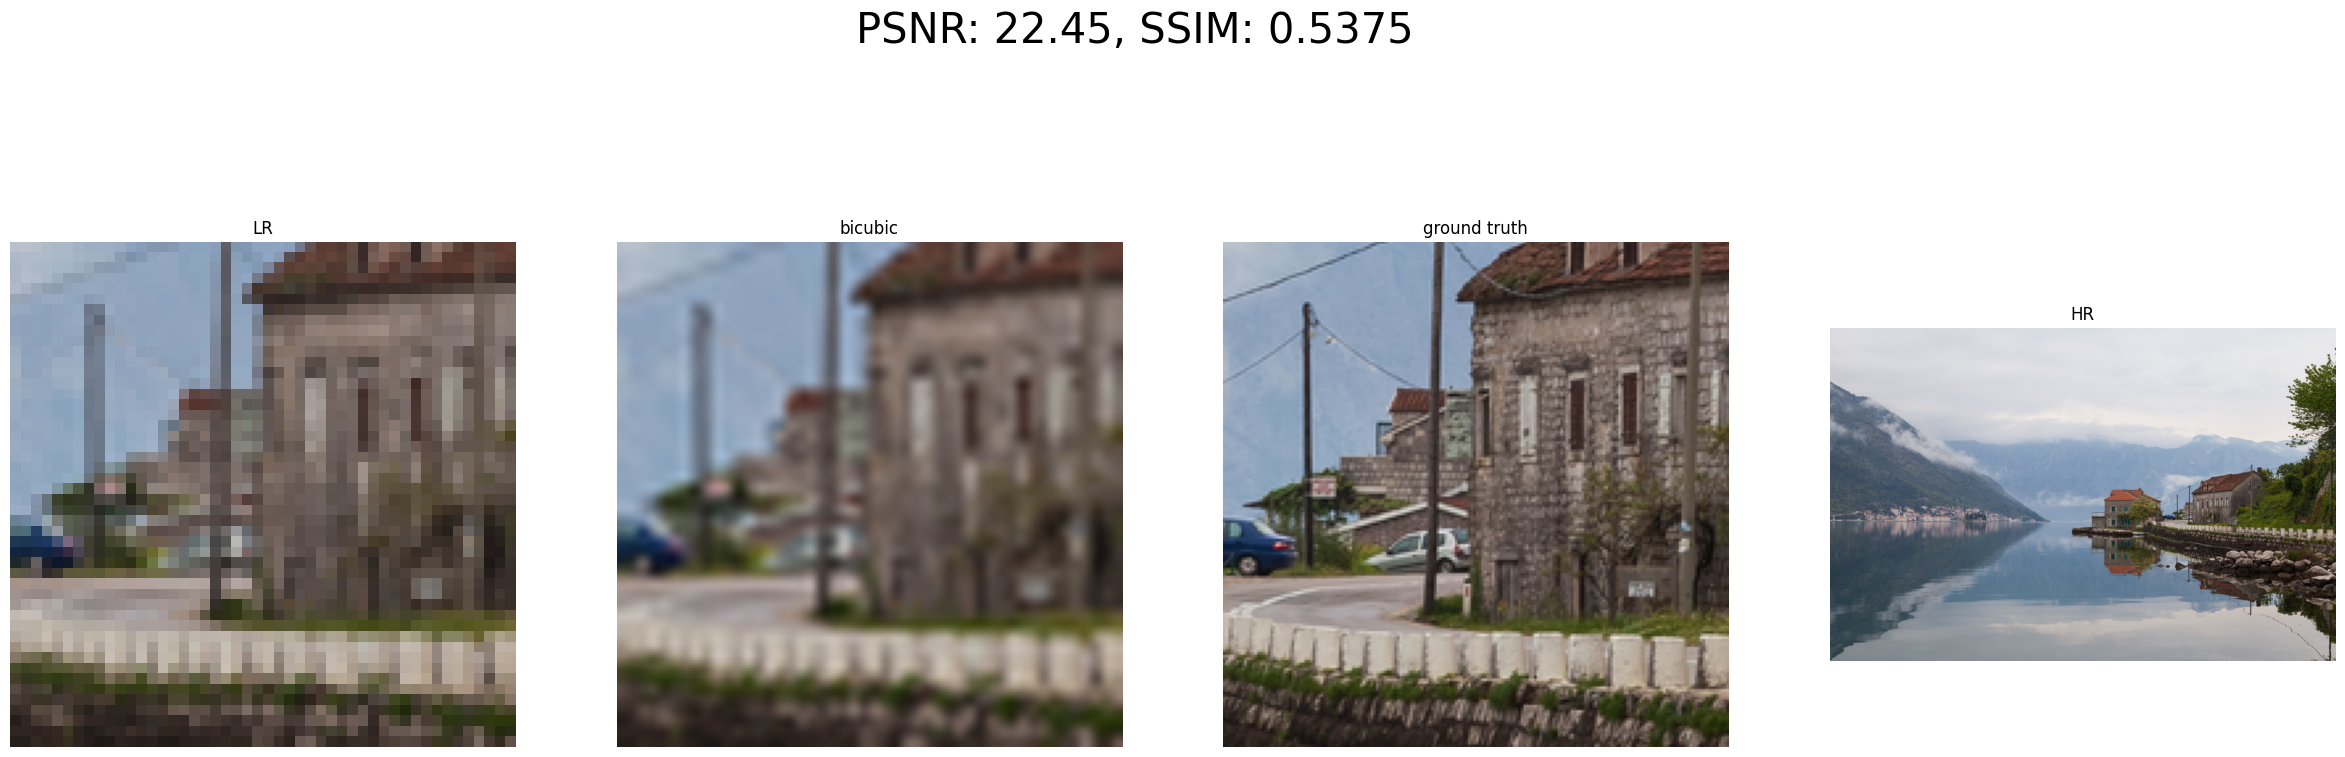

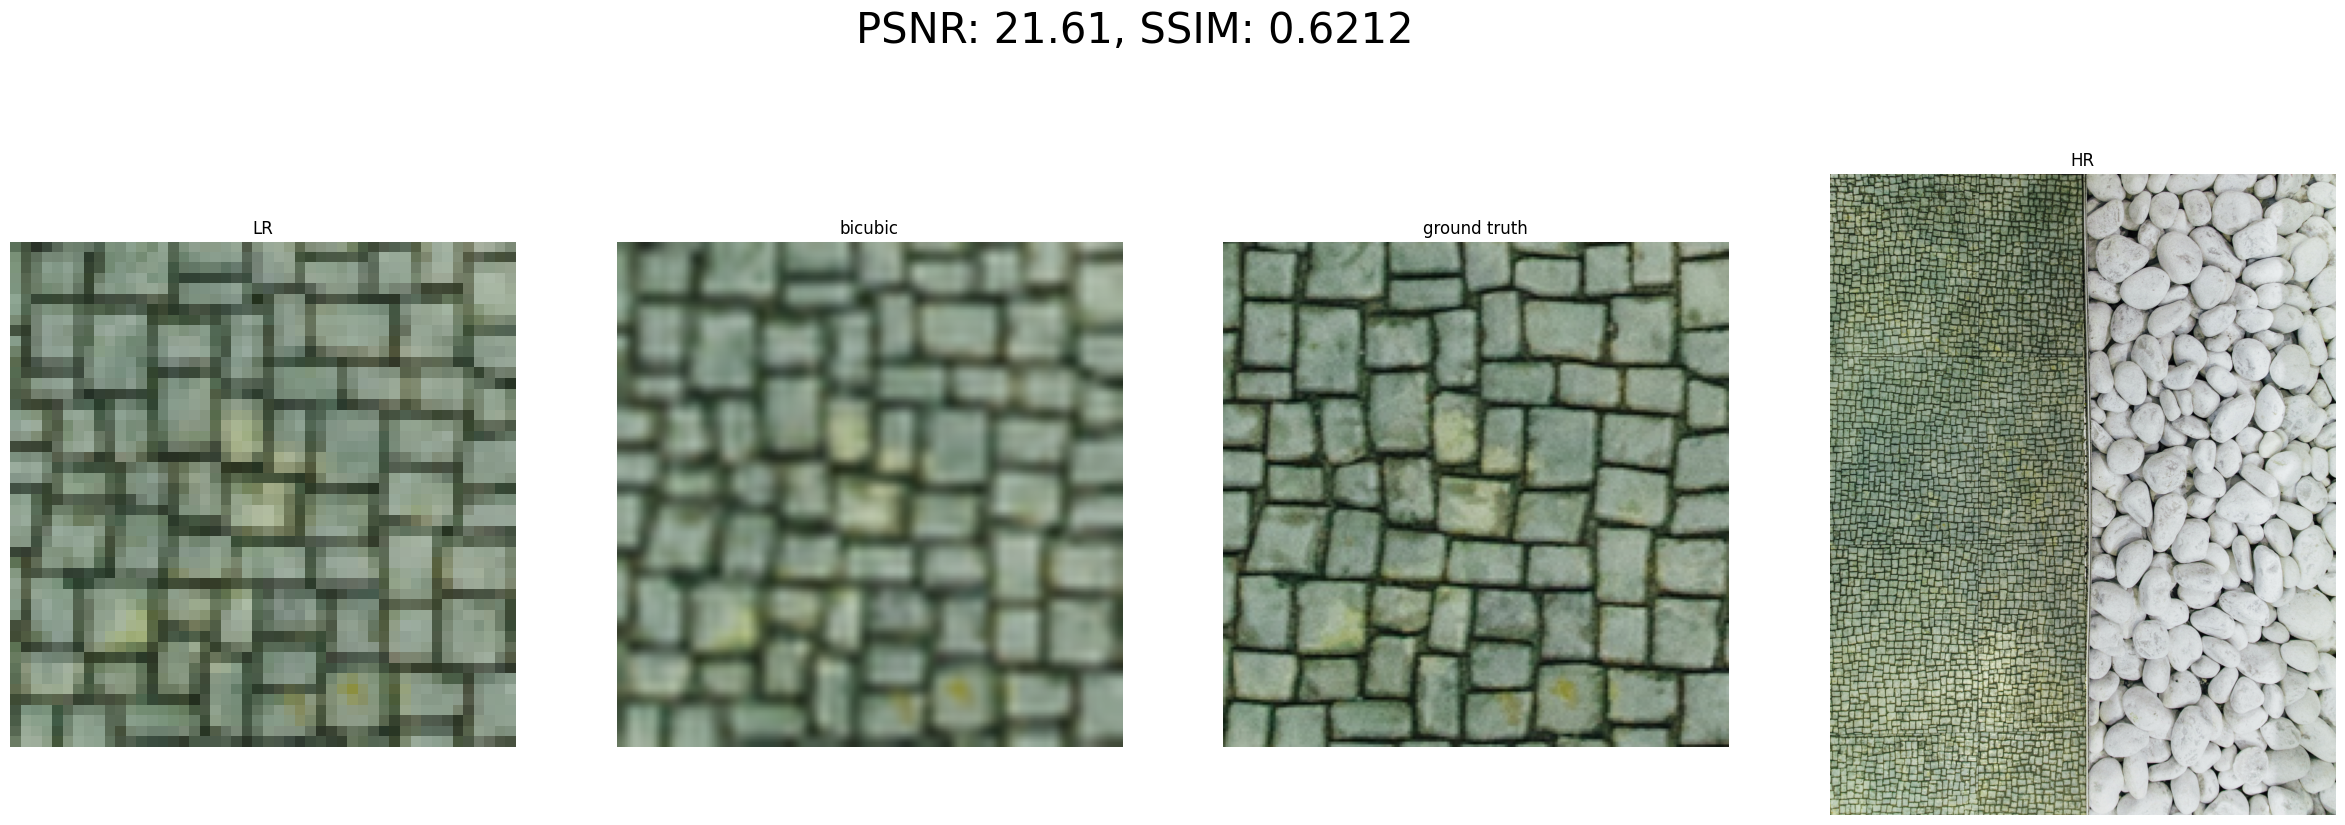

In [ ]:
valid_dataset = DIV2K(data_dir, train=True, visualize=True)

for i, (lr_image_patched, hr_image_patched, lr_image, hr_image) in enumerate(valid_dataset):
    
    if i == 5:
        break
    lr_image_patched = lr_image_patched.unsqueeze(0)
    hr_image_patched = hr_image_patched.unsqueeze(0)
    output = F.interpolate(lr_image_patched, scale_factor=4, mode='bicubic', align_corners=False)
    
    psnr = 10 * torch.log10(1 / F.mse_loss(output, hr_image_patched))
    ssim = structural_similarity_index_measure(output, hr_image_patched)
    
    
    fig, axis = plt.subplots(1, 4, figsize=(30, 10))
    fig.suptitle(f"PSNR: {psnr:.2f}, SSIM: {ssim:.4f}", fontsize=30)
    axis[0].imshow(lr_image_patched.squeeze(0).permute(1, 2, 0))
    axis[0].set_title("LR")
    axis[0].axis('off')
    
    axis[1].imshow(output.squeeze(0).permute(1, 2, 0))
    axis[1].set_title("bicubic")
    axis[1].axis('off')
    
    axis[2].imshow(hr_image_patched.squeeze(0).permute(1, 2, 0))
    axis[2].set_title("ground truth")
    axis[2].axis('off')
    
    axis[3].imshow(hr_image.squeeze(0).permute(1, 2, 0))
    axis[3].set_title("HR")
    axis[3].title_size = 30
    axis[3].axis('off')
    
    plt.show()
    
    
    
    
    